In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter, namedtuple

In [2]:
df_all = pd.read_csv('data_combined.csv')

In [3]:
df_all

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
...,...,...,...
26005,0.947673,1.215055,0.890908
26006,0.955931,1.208177,0.953965
26007,0.966341,1.197593,0.909146
26008,0.954297,1.158244,0.933508


In [10]:
len(df_all)

26010

In [8]:
# px.box(df_all, y="amp")


In [8]:
data_combined = pd.read_csv('data_combined.csv')
data_combined = data_combined[data_combined['fitness'] > 0.9].drop(columns=['fitness'])
data_combined

,amp,phase
170,1.302916,0.117107
180,1.305603,0.093452
181,1.324101,0.135208
182,1.315881,0.144908
183,1.298653,0.134184
...,...,...
26005,1.215055,0.890908
26006,1.208177,0.953965
26007,1.197593,0.909146
26008,1.158244,0.933508


In [14]:
z_scores = np.abs((data_combined - data_combined.mean()) / data_combined.std())
outlier_mask = (z_scores > 8).any(axis=1)  # Example threshold: 3 standard deviations

# Step 3: Decide on Outlier Handling Strategy
# In this example, we'll remove outliers
data_no_outliers = data_combined[~outlier_mask]

data_combined

,amp,phase
170,1.302916,0.117107
180,1.305603,0.093452
181,1.324101,0.135208
182,1.315881,0.144908
183,1.298653,0.134184
...,...,...
26005,1.215055,0.890908
26006,1.208177,0.953965
26007,1.197593,0.909146
26008,1.158244,0.933508


In [6]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.05, min_samples=2*2).fit(data_combined)
# get cluster labels
print(Counter(clusters.labels_))

Counter({0: 6295, 1: 2887, 2: 14})


In [7]:
1260*0.1

126.0

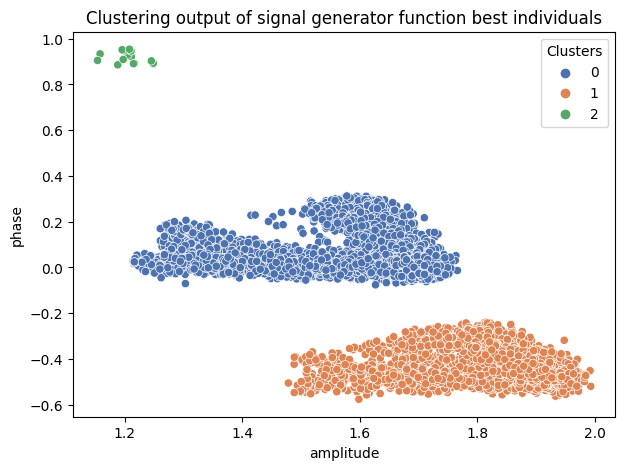

In [7]:
plt.figure(figsize=(7,5))
p = sns.scatterplot(data=data_combined, x="amp", y="phase", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", title='Clusters')
p.set(xlabel='amplitude', ylabel= 'phase', title= 'Clustering output of signal generator function best individuals')

plt.savefig('clusters.pdf')

plt.show()


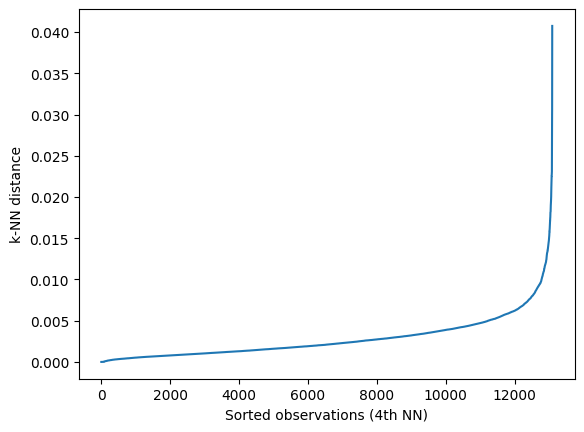

13087
13087


In [88]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=50).fit(data_combined)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data_combined)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)


k_dist = sort_neigh_dist[:, 1]
x_index = [i for i in range(len(k_dist))]
plt.plot(x_index,k_dist)
# plt.axhline(y=0.02, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


from kneed import DataGenerator, KneeLocator

kneedle = KneeLocator(x=x_index, y=k_dist, S=0, curve="convex", direction="increasing")

print(kneedle.knee)
print(kneedle.elbow)

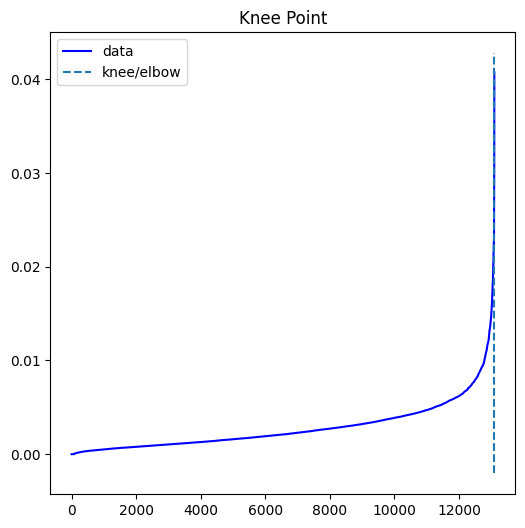

In [92]:
kneedle.plot_knee()

In [91]:
print(k_dist[kneedle.knee] * 2)
print(k_dist[kneedle.elbow] * 2)

0.05739919633450582
0.05739919633450582


In [37]:
from sklearn.cluster import DBSCAN
df = df_06[df_06['fitness'] > 0.5].drop(columns=['fitness'])
clusters = DBSCAN(eps=0.16, min_samples=4).fit(df)
# get cluster labels
set(clusters.labels_)


plt.figure(figsize=(7,5))
p = sns.scatterplot(data=df, x="amp", y="phase", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", title='Clusters')

# plt.savefig('clusters.pdf')

plt.show()

# clusters.size
print(len(df))

NameError: name 'df_06' is not defined

In [8]:
df_all.describe()

,fitness,amp,phase
count,26010.000000,26010.000000,26010.000000
mean,0.433545,1.241296,0.288753
std,0.668521,0.457094,0.529554
min,-3.486636,-0.265756,-0.576277
25%,0.063290,0.936999,-0.008751
50%,0.705476,1.315978,0.126489
75%,0.971680,1.632469,0.620995
max,1.000000,1.992674,2.107378


In [22]:
df_bad = df_all[(df_all['fitness'] < 0.3) & (df_all['fitness'] > 0.1)].head(20)

df_good = df_all[(df_all['fitness'] > 0.9)].head(10)

df_com = pd.concat([df_good,df_bad])

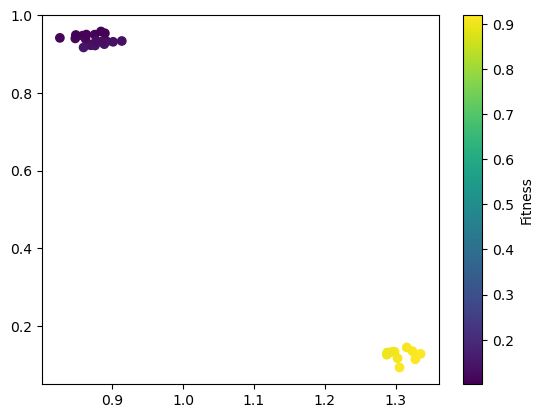

In [36]:
plt.figure()

plt.scatter(data=df_com, x="amp", y="phase", c=df_com['fitness'])
plt.colorbar(label="Fitness", pad=0.05)

# plt.savefig('mapped_data.pdf')

plt.show()


# plt.figure(figsize=(10,10))

# plt.scatter(mapped_data_2['amp'],mapped_data_2['phase'],c=mapped_data_2['fitness'])
# plt.xlabel('amplitude')
# plt.ylabel('phase')
# plt.colorbar(label="Fitness", pad=0.05)

# plt.show()

In [23]:
import random

randomlist_x = 1 * np.random.random_sample((10,)) + 1.5 #[1.5, 1.9] 1
randomlist_y = 1 * np.random.random_sample((10,)) + 1 #[1, 1.4] 1
print(randomlist_x)
print(randomlist_y)

[2.02654208 2.4952343  2.20640771 2.38184672 1.76373628 2.17486066
 1.60866075 2.36279196 2.02321081 1.86264844]
[1.72554993 1.49059686 1.72640645 1.84714431 1.72252466 1.39100992
 1.4200701  1.76629354 1.381134   1.1246971 ]


In [20]:
randomlist_x = 1.5 * np.random.random_sample((10,)) + 1 #[1, 2.5] 1.5
randomlist_y = 2.5 * np.random.random_sample((10,)) + 2 #[2, 4.5] 2.5
print(randomlist_x)
print(randomlist_y)


[1.0618149  1.74901466 1.8164859  1.84116671 1.17245228 2.28649134
 1.68837771 1.86029737 2.15765105 1.28855463]
[3.81913075 3.30065893 3.92549965 3.36428012 4.22269008 3.37121789
 3.85693898 3.57077435 3.68451839 3.54935275]


In [26]:
x = [2.02654208,2.4952343,2.20640771,2.38184672,1.76373628,2.17486066,1.60866075,2.36279196,2.02321081,1.86264844]
y = [1.72554993,1.49059686,1.72640645,1.84714431,1.72252466,1.39100992,1.4200701,1.76629354,1.381134,1.1246971]

np.mean(y)


1.559542687

In [4]:
# df_all = pd.read_csv('data_combined.csv')
df_all = pd.read_csv('/home/wasab/L2L_LO/SG_data_06.csv')

NameError: name 'pd' is not defined

In [86]:
df_all

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
...,...,...,...
11548,0.533837,1.163603,0.845801
11549,0.582630,1.185718,0.861585
11550,0.568132,1.229921,0.857287
11551,0.584905,1.178545,0.837478


In [112]:
all_data = pd.read_csv('/home/wasab/L2L_V2/data/all_data.csv')

In [114]:
all_data.describe()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,3.339227,-2.611820,8.474784,7.496934,-3.433758,-10.120579,0.737205,-15.089968,11.252419,-0.384700,...,-3.783591,-13.060195,-12.350801,-0.510091,14.373314,10.386260,14.465751,-10.401562,10.604438,0.317035
std,11.752750,9.224567,9.524505,9.045787,10.855721,8.690122,9.791602,6.557629,8.135494,10.101959,...,12.181345,6.601661,7.206257,8.753126,5.729356,7.311575,6.075137,5.269338,7.738212,0.309841
min,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-19.968582,-19.823770,-19.968438,-20.000000,-20.000000,-0.589640
25%,-6.752065,-8.632211,3.649745,1.487407,-11.793479,-16.595699,-6.030248,-18.583390,8.543170,-7.961121,...,-15.766383,-17.447197,-17.503276,-6.547872,12.831793,4.780905,12.639519,-13.239101,5.991544,0.200629
50%,4.373699,-3.274182,10.978404,9.932821,-4.478178,-13.026563,0.520329,-16.851727,13.243152,1.162569,...,-4.461270,-14.812277,-13.993222,0.209365,15.568968,11.400791,15.894839,-10.897637,12.150467,0.501136
75%,14.558700,2.976916,15.463466,14.417364,2.918113,-4.839334,7.730610,-14.534414,16.840469,6.368943,...,6.727391,-10.594902,-9.723101,5.976472,17.812926,16.763648,18.300242,-8.707470,16.805433,0.513418
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.970486,20.000000,20.000000,...,20.000000,19.972211,20.000000,20.000000,20.000000,20.000000,20.000000,19.938839,20.000000,0.530508


In [116]:
all_data[all_data['fitness'] <= 0.1].to_csv('/home/wasab/L2L_V2/data/data_01.csv',index=False)

In [7]:
data_03 = pd.read_csv('/home/wasab/L2L_V2/data/mapped_data_02.csv')
data_03

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
0,1.632617,-11.933054,20.000000,1.161766,-13.494761,-12.163637,-4.490553,-20.000000,9.363010,10.464011,...,13.148315,-16.554755,-12.347380,-2.464729,16.694619,17.934208,11.756597,-12.666644,-0.863566,0.523441
1,-14.254986,1.601560,1.926295,5.637786,15.033197,-19.480144,-4.662046,-17.346572,17.174751,-11.229785,...,19.251084,-15.030712,-9.031024,1.642942,13.024085,16.294306,17.775547,-15.720774,4.834422,-0.400256
2,-13.650803,0.901533,4.150202,-3.099892,-6.906453,-17.701766,-15.097027,3.254115,8.691664,-6.562621,...,5.058807,-11.426014,-8.304040,2.852628,12.039074,15.643605,17.344875,-15.722487,12.107785,0.523383
3,14.670794,0.797793,5.457897,14.173014,-4.802854,-17.506717,-4.524419,-15.534679,15.452972,-12.015041,...,-10.757300,-16.595813,-11.225069,-1.939628,10.062555,12.587357,17.731560,-13.167098,16.968189,0.119267
4,-8.528775,-8.186667,13.768879,17.378659,5.995117,-7.062664,-9.711532,-18.398591,12.221481,3.558689,...,13.188076,-9.181602,-19.274680,-10.154090,19.579293,12.738377,14.710231,-10.255350,10.048581,-0.167686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,12.620727,-8.643749,14.470362,17.502019,-4.537522,-2.870188,3.378407,-19.615525,15.901868,-14.374038,...,-16.985518,-15.600371,-10.380423,7.556966,15.037178,4.555832,9.852708,-10.078683,15.784569,0.495329
2796,-9.873772,-11.784781,17.567329,11.350002,-8.232666,-2.554131,-3.452495,-19.773758,11.474782,7.308563,...,-7.111040,-10.264131,-15.635701,-7.209394,16.380484,10.451305,15.969641,-11.515462,4.908553,0.301126
2797,-10.345651,-4.362337,10.100286,8.011840,-10.621642,-16.494816,7.140868,-15.285003,19.233381,11.657933,...,10.301870,-10.094417,-16.315000,-12.653627,15.687087,19.024284,13.317406,-12.134441,5.649631,0.454353
2798,-5.699440,1.510320,-5.866939,-5.283534,-2.943974,-17.222085,-13.061999,-8.768655,14.878317,-6.560669,...,8.327788,-14.043003,-17.023873,2.731932,15.494594,17.473651,16.003606,-13.380975,2.413410,0.517244


In [37]:
a= data_03[['w0']].values.tolist()
b= all_data[(all_data['fitness'] >= 0.3) & (all_data['fitness'] < 0.4) ][['w0']].values.tolist()

In [46]:
a = [item for a0 in a for item in a0]
b = [item for b0 in b for item in b0]

In [49]:
len(set(a))

84

In [50]:
len(set(b))

84

In [20]:
mapped_mc_data = pd.read_csv('/home/wasab/L2L/mapped_data_mc.csv')
mapped_mc_data_norm = pd.read_csv('/home/wasab/L2L_LO/mapped_data_mc_norm.csv')

In [87]:
df = df_all.copy()
df= df[df['fitness'] > 0.5].drop(columns=['fitness'])

In [21]:
mapped_mc_data

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
0,-3.442985,17.822343,4.011906,-1.440091,-14.297319,-15.990286,-7.552039,-17.212040,17.920693,-1.247017,...,10.797750,-17.193483,-11.206205,-0.129891,18.908575,16.372104,11.339315,-12.542831,5.901879,0.523441
1,-9.242321,-3.814355,-0.772342,-6.544160,14.504614,-15.576765,-3.038952,-16.299343,9.131523,-1.849089,...,6.285968,-13.772532,-11.810923,0.302762,12.200292,18.464229,16.141717,-12.788630,7.884643,-0.400256
2,-5.325138,-5.799990,-1.658825,-0.450046,-6.153256,-16.764730,0.302395,-14.997227,6.411151,-2.353863,...,5.722699,-13.352966,-13.974458,2.287002,17.945649,17.337340,13.981207,-14.713235,5.668173,0.523383
3,10.806513,-5.224011,12.162792,14.580215,-7.254623,-6.181456,-0.351730,-18.073701,16.296902,-5.246304,...,-7.909478,-16.564533,-14.661097,5.396122,15.418809,13.140778,16.982992,-10.192684,17.542389,0.119267
4,-9.133499,-4.702874,13.795123,13.516142,-2.279347,-11.473746,1.730044,-16.882437,8.084606,2.912404,...,6.398558,-11.197065,-17.257315,-10.994857,15.621899,14.649499,18.271081,-8.984995,8.378641,-0.167686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,14.898692,-6.806904,10.900449,14.846482,-4.063792,-6.113214,7.719087,-17.652250,16.797612,-9.588833,...,-17.969620,-15.832570,-9.079750,6.245118,16.525843,4.005040,11.558148,-9.347630,16.147656,0.495329
2796,-8.723123,1.050470,8.560825,12.663758,-3.107835,-14.774759,5.272660,-15.582217,10.854588,1.812542,...,3.486729,-13.088826,-17.149980,-3.949718,16.269541,14.117847,16.456208,-10.137736,6.659602,0.301126
2797,-11.660710,-2.247136,11.682506,9.362164,-12.187301,-14.414040,8.741722,-14.105358,15.864627,2.360956,...,5.085669,-14.095711,-15.137927,-7.916337,16.714946,17.773309,15.808525,-9.089824,5.718592,0.454353
2798,-4.618182,-3.520188,-8.911520,-7.573774,-3.147707,-17.351681,-6.488980,-15.966589,4.414582,-9.644028,...,10.624488,-9.875163,-11.304879,-2.788865,14.570648,17.274249,14.862416,-14.690300,9.118906,0.517244


In [4]:
# normalized_df=(df-df.min())/(df.max()-df.min())
# normalized_df

In [5]:
df.describe()

,amp,phase
count,9196.000000,9196.000000
mean,1.662019,-0.100383
std,0.160915,0.240012
min,1.153980,-0.576277
25%,1.584860,-0.368798
50%,1.670221,0.003164
75%,1.747098,0.046161
max,1.992674,0.953965


In [3]:
all_data = pd.read_csv('/home/wasab/L2L_V2/data/all_data.csv')
df_targets = all_data.drop(columns=['fitness'])
normalized_df=(df_targets-df_targets.min())/(df_targets.max()-df_targets.min())
normalized_df['fitness'] = all_data['fitness']
# df2 = all_data[all_data['fitness'] > 0.44].drop(columns=['fitness'])
# len(df2.columns)

In [151]:
normalized_df

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
0,0.498334,0.979101,0.647874,0.218756,0.193373,0.094783,0.369825,0.062290,0.975446,0.456427,...,0.725746,0.014286,0.223594,0.531309,0.818466,0.875739,0.808482,0.211433,0.592805,0.523441
1,0.148839,0.300569,0.451306,0.350301,1.000000,0.096179,0.204488,0.028888,0.846364,0.108426,...,0.756780,0.118967,0.445924,0.680920,0.885438,0.911851,0.840878,0.030254,0.660345,-0.400256
2,0.039204,0.477014,0.439657,0.425049,0.425802,0.195175,0.669983,0.131428,0.689364,0.606907,...,0.705223,0.158501,0.066142,0.432326,1.000000,0.917758,0.690628,0.076713,0.728438,0.523383
3,0.783120,0.307097,0.949631,0.970367,0.336333,0.598758,0.454172,0.006043,1.000000,0.729447,...,0.283209,0.182996,0.093995,0.187441,0.922997,0.840602,0.981705,0.306145,0.925312,0.119267
4,0.084281,0.524561,0.832277,0.946490,0.483513,0.351029,0.383296,0.000000,0.681394,0.463873,...,0.782473,0.355882,0.009022,0.050753,0.956055,0.884673,0.889184,0.367733,0.714679,-0.167686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.689838,0.391191,0.853499,0.954406,0.463530,0.412657,0.928543,0.013715,1.000000,0.385053,...,0.103137,0.069348,0.453001,0.665607,0.948799,0.631538,0.788552,0.247366,0.891642,0.495329
2796,0.168170,0.602558,0.545390,0.672301,0.690351,0.049118,0.803258,0.078526,0.813355,0.572226,...,0.255783,0.111596,0.104380,0.399952,0.819615,0.763565,0.824491,0.199622,0.673717,0.301126
2797,0.000000,0.657943,0.833777,0.643676,0.131508,0.155026,0.864394,0.011858,0.923175,0.417944,...,0.563830,0.008792,0.152951,0.277286,0.819493,0.979662,0.890108,0.289535,0.549817,0.454353
2798,0.374747,0.485069,0.000000,0.059597,0.564469,0.179427,0.285140,0.000000,0.709342,0.268311,...,0.744027,0.034096,0.240567,0.381202,0.876047,0.921276,0.889056,0.166956,0.776001,0.517244


In [4]:
all_data.describe()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,3.339227,-2.611820,8.474784,7.496934,-3.433758,-10.120579,0.737205,-15.089968,11.252419,-0.384700,...,-3.783591,-13.060195,-12.350801,-0.510091,14.373314,10.386260,14.465751,-10.401562,10.604438,0.317035
std,11.752750,9.224567,9.524505,9.045787,10.855721,8.690122,9.791602,6.557629,8.135494,10.101959,...,12.181345,6.601661,7.206257,8.753126,5.729356,7.311575,6.075137,5.269338,7.738212,0.309841
min,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-19.968582,-19.823770,-19.968438,-20.000000,-20.000000,-0.589640
25%,-6.752065,-8.632211,3.649745,1.487407,-11.793479,-16.595699,-6.030248,-18.583390,8.543170,-7.961121,...,-15.766383,-17.447197,-17.503276,-6.547872,12.831793,4.780905,12.639519,-13.239101,5.991544,0.200629
50%,4.373699,-3.274182,10.978404,9.932821,-4.478178,-13.026563,0.520329,-16.851727,13.243152,1.162569,...,-4.461270,-14.812277,-13.993222,0.209365,15.568968,11.400791,15.894839,-10.897637,12.150467,0.501136
75%,14.558700,2.976916,15.463466,14.417364,2.918113,-4.839334,7.730610,-14.534414,16.840469,6.368943,...,6.727391,-10.594902,-9.723101,5.976472,17.812926,16.763648,18.300242,-8.707470,16.805433,0.513418
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.970486,20.000000,20.000000,...,20.000000,19.972211,20.000000,20.000000,20.000000,20.000000,20.000000,19.938839,20.000000,0.530508


In [78]:
df2.describe()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w305,w306,w307,w308,w309,w310,w311,w312,w313,w314
count,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,...,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000
mean,1.324140,-1.732934,8.430806,7.962132,-3.616245,-12.980489,1.490132,-16.323209,11.906984,-0.805043,...,-10.511908,-1.349155,-14.369046,-13.524957,-1.917002,15.842857,12.829530,16.231451,-10.967264,10.615217
std,11.124721,9.306322,9.120570,8.725675,11.150304,6.489980,10.091718,3.801252,6.951770,10.432061,...,6.075018,11.560304,4.393851,5.519408,8.445850,3.283375,5.539678,3.134238,3.104450,6.494088
min,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,...,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-10.416592,-5.649067,3.714567,-20.000000,-20.000000
25%,-7.707668,-8.033671,3.763338,1.820155,-12.131938,-17.454963,-5.316623,-18.703428,9.169160,-8.752116,...,-14.485259,-10.664270,-17.564325,-17.778817,-7.634393,14.261834,9.128203,14.401407,-12.795020,5.959229
50%,0.501338,-2.181049,10.518682,10.501268,-5.184660,-14.817720,1.582612,-17.051880,13.268739,0.585696,...,-10.952205,-1.036761,-15.321598,-14.673987,-2.129965,16.253628,13.873876,16.993138,-10.837953,11.229076
75%,11.106463,3.997866,15.121926,14.447817,2.951158,-9.987860,8.957575,-15.112856,16.646412,6.415890,...,-7.858878,8.086916,-11.998643,-10.776323,4.040065,18.247449,17.471392,18.670939,-9.090586,16.168794
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,12.581709,20.000000,20.000000,...,20.000000,20.000000,10.498233,10.753828,20.000000,20.000000,20.000000,20.000000,1.616107,20.000000


In [88]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

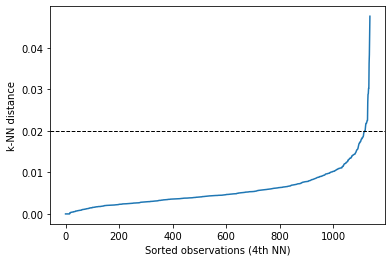

In [89]:
k_dist = sort_neigh_dist[:, 1]
x_index = [i for i in range(len(k_dist))]
plt.plot(x_index,k_dist)
plt.axhline(y=0.02, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [108]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.1, min_samples=2*2).fit(df)
# get cluster labels
set(clusters.labels_)

{0, 1, 2, 3, 4, 5}

In [109]:
# from sklearn.cluster import OPTICS

# clustering = OPTICS(eps=0.1, min_samples=4).fit(df)
# set(clustering.labels_)

In [110]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 519, 1: 349, 2: 74, 3: 4, 4: 185, 5: 8})

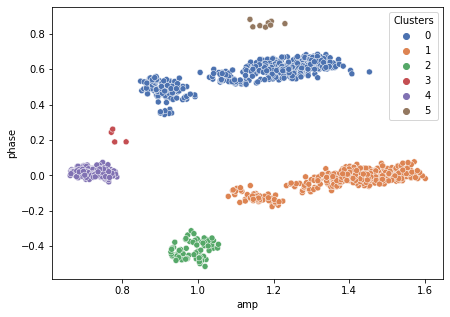

In [111]:
plt.figure(figsize=(7,5))
p = sns.scatterplot(data=df, x="amp", y="phase", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", title='Clusters')

plt.savefig('clusters.pdf')

plt.show()



In [26]:
df['cluster'] = clusters.labels_

In [27]:
df[df['cluster'] == 1].mean()

Unnamed: 0    1334.704545
amp              1.217384
phase            0.625326
cluster          1.000000
dtype: float64

In [28]:
df[df['cluster'] == 2].mean()

Unnamed: 0    2059.230769
amp              1.565582
phase           -0.000450
cluster          2.000000
dtype: float64

In [94]:
from kneed import DataGenerator, KneeLocator

kneedle = KneeLocator(x=x_index, y=k_dist, S=0, curve="convex", direction="increasing")

print(kneedle.knee)
print(kneedle.elbow)

1134
1134


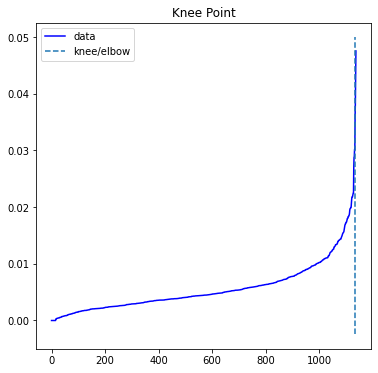

In [95]:
kneedle.plot_knee()

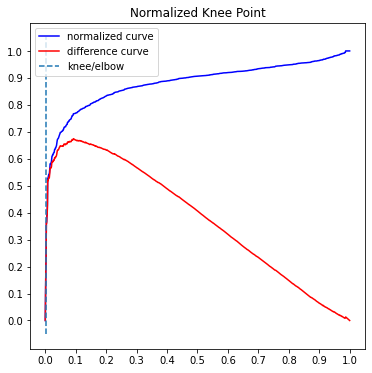

In [96]:
kneedle.plot_knee_normalized()

In [97]:
k_dist[kneedle.knee]

0.030202543474316126

In [98]:
k_dist[kneedle.elbow]

0.030202543474316126

In [99]:
round(k_dist[kneedle.elbow]*2,2)

0.06

In [4]:
mapped_data_4 = pd.read_csv('mapped_data_test_01_4.csv')
mapped_data_10 = pd.read_csv('mapped_data_test_01_10.csv')
mapped_data_16 = pd.read_csv('mapped_data_test_01_16.csv')

mapped_data_1 = pd.read_csv('mapped_data_test_1.csv')
mapped_data_2 = pd.read_csv('mapped_data_test_2.csv')


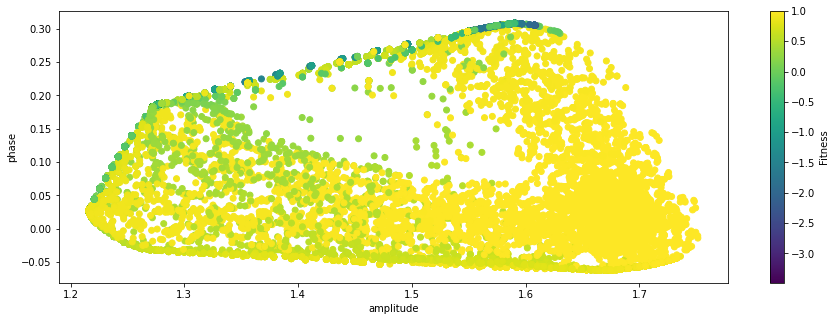

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.scatter(mapped_data_1['amp'],mapped_data_1['phase'],c=mapped_data_1['fitness'])
plt.xlabel('amplitude')
plt.ylabel('phase')
plt.colorbar(label="Fitness", pad=0.05)

# plt.savefig('mapped_data.pdf')

plt.show()

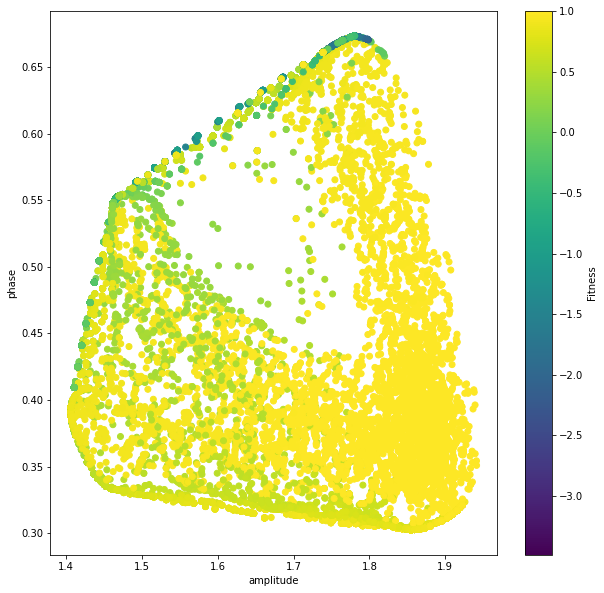

In [26]:
plt.figure(figsize=(10,10))

plt.scatter(mapped_data_2['amp'],mapped_data_2['phase'],c=mapped_data_2['fitness'])
plt.xlabel('amplitude')
plt.ylabel('phase')
plt.colorbar(label="Fitness", pad=0.05)

plt.show()

In [27]:
# import seaborn as sns 
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# boston.head()
df2

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w305,w306,w307,w308,w309,w310,w311,w312,w313,w314
0,-0.066627,19.164022,5.914961,-11.249769,-12.265086,-16.208694,-5.207014,-17.510253,19.017838,-1.742928,...,-10.286382,9.029852,-19.428947,-11.056248,1.252363,12.744351,15.051452,12.345342,-11.555631,3.712204
2,-18.431830,-0.919450,-2.413716,-2.998040,-2.967916,-12.193012,6.799316,-14.746746,7.574543,4.276290,...,-8.128111,8.208937,-13.664368,-17.354303,-2.706971,20.000000,16.724829,7.634880,-16.936165,9.137507
5,20.000000,1.672706,10.959621,14.391812,-11.046300,-19.198237,-0.813732,-18.260970,17.741080,-20.000000,...,-14.847286,1.088157,-13.058067,-17.458717,14.369168,19.723319,9.510627,19.301152,-12.870034,18.034409
6,-14.716545,3.167530,6.462839,-6.686970,-12.509528,-13.968565,19.863335,-20.000000,20.000000,8.775652,...,-14.342031,17.489547,-13.867917,-9.676684,-20.000000,17.737762,16.636174,16.417541,-11.734693,3.541498
7,0.233656,20.000000,5.710089,-9.532335,-16.613700,-13.110691,-4.319764,-17.932661,20.000000,-1.728972,...,-12.250101,9.434049,-12.998505,-10.544721,-4.292217,15.422450,15.845072,18.905037,-12.871142,11.160778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,-16.364307,-8.863726,-0.630265,3.935178,-20.000000,-19.209462,20.000000,-18.275111,11.248401,-19.686471,...,-19.361112,7.978949,-12.410379,2.173189,-10.541368,14.035166,18.384607,17.240854,-12.381715,9.479891
2794,-19.458560,-14.526963,13.570153,14.799033,-12.258716,-16.412186,1.990524,-17.079100,10.206248,0.995764,...,-17.879824,8.024387,-9.608656,-12.014802,-11.007112,14.628037,9.102883,19.328481,-12.057380,4.516307
2795,7.593531,-4.352354,14.139953,18.176239,-1.458793,-3.493725,17.141712,-19.451789,20.000000,-4.597863,...,-9.585631,-15.874512,-17.228017,-1.879970,6.624268,17.953549,5.326453,11.548760,-10.120501,15.665664
2797,-20.000000,6.317730,13.351083,5.747060,-14.739663,-13.798961,14.575764,-19.526023,16.927011,-3.282260,...,-18.510106,2.553214,-19.648577,-13.881946,-8.908546,12.785387,19.190058,15.607804,-8.436312,1.992676


In [52]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df2)
x = pd.DataFrame(x, columns=df2.columns)

In [4]:
x = all_data

In [5]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=4)
pca = pcamodel.fit_transform(x)
pca.shape

(2800, 4)

In [6]:
pcamodel.components_

array([[-0.12692688,  0.02328947, -0.0624783 , ..., -0.00264604,
        -0.06828464,  0.00075422],
       [ 0.01642975, -0.01316441, -0.05814889, ...,  0.01803674,
        -0.04440642, -0.00438674],
       [-0.03957489,  0.02636636, -0.0114924 , ...,  0.08030543,
        -0.06360628, -0.00358682],
       [-0.02972681, -0.02628554,  0.08648564, ..., -0.00314974,
        -0.00340275, -0.00077512]])

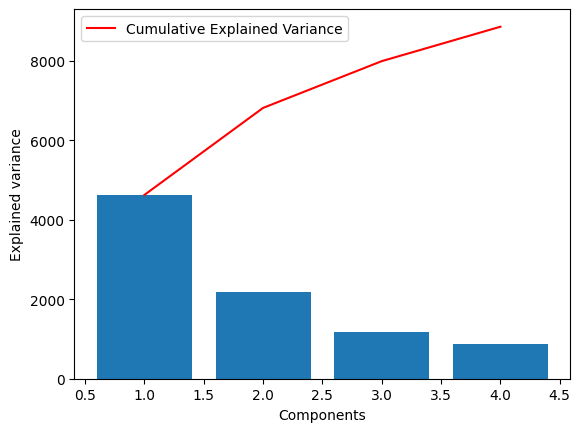

In [7]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

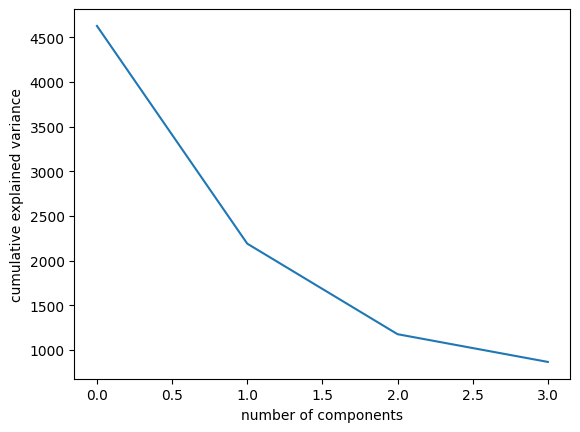

In [9]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

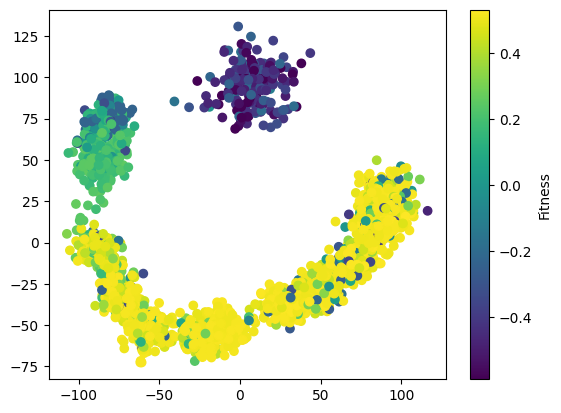

In [10]:
plt.figure()
plt.scatter(pca[:, 0], pca[:, 1],c=all_data['fitness'])
plt.colorbar(label="Fitness", pad=0.05)

# plt.savefig('2d_pca.pdf')

plt.show()

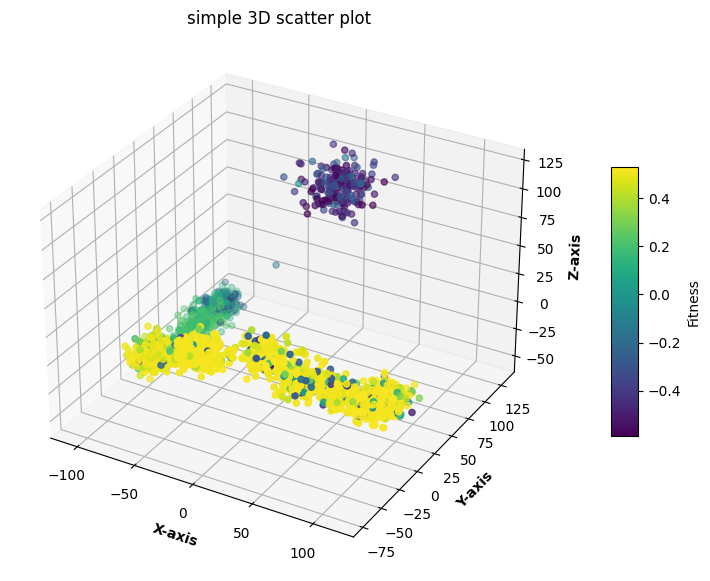

In [11]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(pca[:, 0], pca[:, 1],pca[:, 2],c=all_data['fitness'])
# fig.colorbar(label="Fitness", pad=0.05)



# sctt = ax.scatter3D(x, y, z,
#                     alpha = 0.8,
#                     c = (x + y + z),
#                     cmap = my_cmap,
#                     marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10, label="Fitness", pad=0.08)
 
# plt.savefig('3d_pca.pdf')
    
# show plot
plt.show()


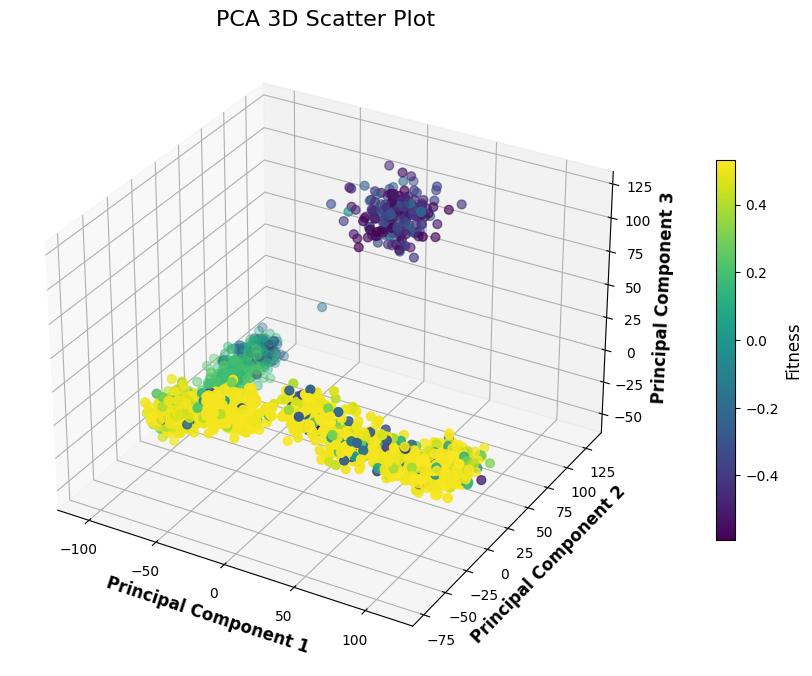

In [9]:
# Create a figure with specified size
fig = plt.figure(figsize=(12, 8))

# Create a 3D subplot
ax = fig.add_subplot(111, projection="3d")

# Scatter plot the PCA components with color-coded points based on fitness
scatter = ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=all_data['fitness'], cmap='viridis', s=40)

# Set plot title and labels for each axis
ax.set_title("PCA 3D Scatter Plot", fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Customize the color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.08)
cbar.set_label("Fitness", fontsize=12)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Customize tick labels and font weight
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_fontweight('bold')
ax.yaxis.label.set_fontweight('bold')
ax.zaxis.label.set_fontweight('bold')

# Increase the padding between the title and the plot
plt.subplots_adjust(top=0.9)

# plt.savefig('3d_pca.pdf')

# Show the plot
plt.show()

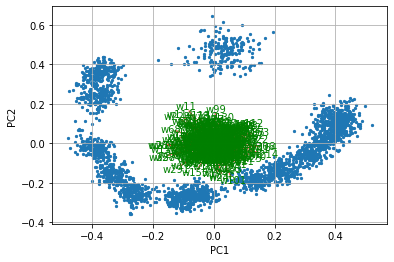

In [73]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()


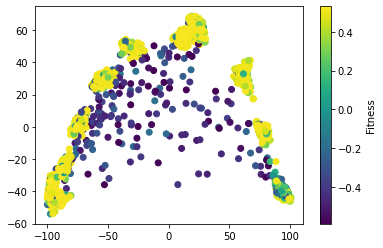

In [28]:
x = mapped_mc_data

pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(x)
pca.shape

plt.scatter(pca[:, 0], pca[:, 1],c=mapped_mc_data['fitness'])
plt.colorbar(label="Fitness", pad=0.05)

# plt.savefig('2d_pca_mapped.pdf')

plt.show()


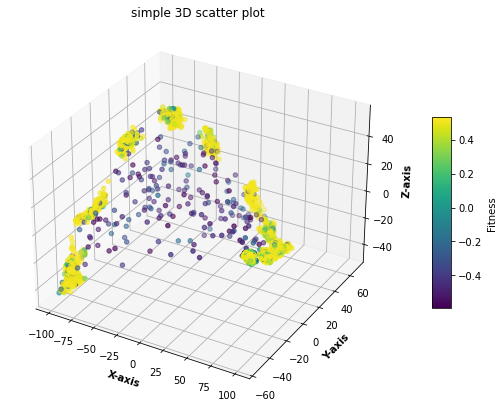

In [29]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(pca[:, 0], pca[:, 1],pca[:, 2],c=mapped_mc_data['fitness'])
# fig.colorbar(label="Fitness", pad=0.05)



# sctt = ax.scatter3D(x, y, z,
#                     alpha = 0.8,
#                     c = (x + y + z),
#                     cmap = my_cmap,
#                     marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10, label="Fitness", pad=0.08)
 
# plt.savefig('3d_pca_mapped.pdf')
    
# show plot
plt.show()


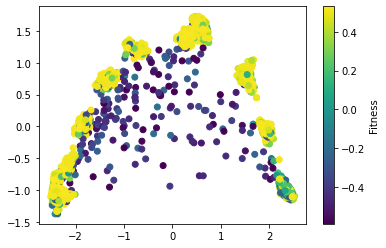

In [111]:
x = mapped_mc_data_norm

pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(x)
pca.shape

plt.scatter(pca[:, 0], pca[:, 1],c=mapped_mc_data_norm['fitness'])
plt.colorbar(label="Fitness", pad=0.05)
plt.show()

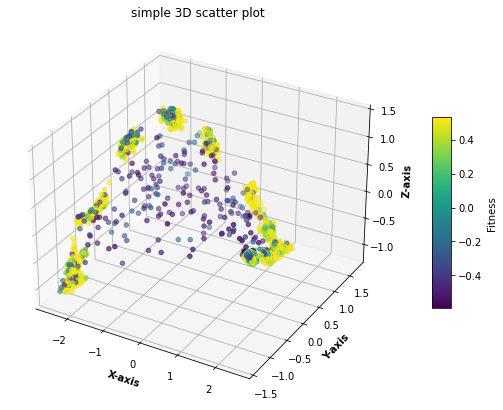

In [112]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(pca[:, 0], pca[:, 1],pca[:, 2],c=mapped_mc_data_norm['fitness'])
# fig.colorbar(label="Fitness", pad=0.05)



# sctt = ax.scatter3D(x, y, z,
#                     alpha = 0.8,
#                     c = (x + y + z),
#                     cmap = my_cmap,
#                     marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 10, label="Fitness", pad=0.08)
 
# show plot
plt.show()

In [131]:
pca[:, 0]

array([-2.40546286, -2.26223985, -2.34956963, ..., -1.79594025,
       -2.45084556,  1.54256966])

In [171]:
clusters = DBSCAN(eps=8, min_samples=700).fit(normalized_df)
# get cluster labels
set(clusters.labels_)

{0}

In [149]:
Counter(clusters.labels_)

Counter({0: 1289, 1: 203, 4: 6, 2: 816, 3: 413, -1: 73})

In [172]:
len(normalized_df)

2800

(array([27062.,  7032.,  7146.,  7391.,  7476.,  7561.,  7608.,  7852.,
         7944.,  7758.,  7975.,  8149.,  8109.,  8190.,  8375.,  8323.,
         8306.,  8111.,  8024.,  8374.,  8095.,  8229.,  8142.,  8295.,
         8031.,  8024.,  8156.,  8008.,  8084.,  8093.,  8137.,  8119.,
         8138.,  8325.,  8216.,  8372.,  8178.,  8051.,  8234.,  8215.,
         8259.,  8056.,  8342.,  8150.,  8321.,  8213.,  8334.,  8418.,
         8350.,  8399.,  8533.,  8735.,  8679.,  8888.,  8642.,  8686.,
         8844.,  8824.,  8794.,  8676.,  8727.,  8664.,  8697.,  8596.,
         8569.,  8675.,  8752.,  8683.,  8716.,  8628.,  8790.,  8666.,
         8772.,  8668.,  8641.,  8645.,  8870.,  8901.,  8780.,  8894.,
         9016.,  9253.,  9202.,  9239.,  9047.,  9510.,  9260.,  9306.,
         9255.,  9420.,  9040.,  8841.,  8935.,  8645.,  8499.,  8246.,
         7847.,  7821.,  7545., 29688.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

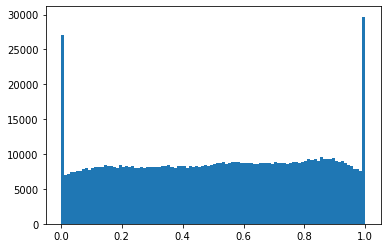

In [179]:
plt.hist(normalized_df.drop(columns=['fitness']).values.flatten(),bins=100)

In [177]:
normalized_df.describe()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,0.583481,0.434705,0.711870,0.687423,0.414156,0.246986,0.518430,0.122841,0.781310,0.490383,...,0.405410,0.173616,0.191230,0.487248,0.859222,0.758593,0.861535,0.240328,0.765111,0.317035
std,0.293819,0.230614,0.238113,0.226145,0.271393,0.217253,0.244790,0.164062,0.203387,0.252549,...,0.304534,0.165156,0.180156,0.218828,0.143346,0.183598,0.151998,0.131935,0.193455,0.309841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.589640
25%,0.331198,0.284195,0.591244,0.537185,0.205163,0.085108,0.349244,0.035441,0.713579,0.300972,...,0.105840,0.063864,0.062418,0.336303,0.820654,0.617839,0.815843,0.169281,0.649789,0.200629
50%,0.609342,0.418145,0.774460,0.748321,0.388046,0.174336,0.513008,0.078765,0.831079,0.529064,...,0.388468,0.129783,0.150169,0.505234,0.889137,0.784068,0.897290,0.227908,0.803762,0.501136
75%,0.863968,0.574423,0.886587,0.860434,0.572953,0.379017,0.693265,0.136741,0.921012,0.659224,...,0.668185,0.235291,0.256922,0.649412,0.945280,0.918733,0.957473,0.282746,0.920136,0.513418
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.530508


(array([  78.,   99.,   96.,  123.,   30.,   61.,  199.,  189.,  121.,
        1804.]),
 array([-0.58963966, -0.47762487, -0.36561007, -0.25359528, -0.14158049,
        -0.02956569,  0.0824491 ,  0.1944639 ,  0.30647869,  0.41849349,
         0.53050828]),
 <BarContainer object of 10 artists>)

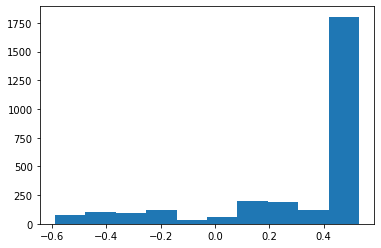

In [180]:
plt.hist(normalized_df['fitness'].values.flatten())

In [181]:
mapped_mc_data

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
0,-3.442985,17.822343,4.011906,-1.440091,-14.297319,-15.990286,-7.552039,-17.212040,17.920693,-1.247017,...,10.797750,-17.193483,-11.206205,-0.129891,18.908575,16.372104,11.339315,-12.542831,5.901879,0.523441
1,-9.242321,-3.814355,-0.772342,-6.544160,14.504614,-15.576765,-3.038952,-16.299343,9.131523,-1.849089,...,6.285968,-13.772532,-11.810923,0.302762,12.200292,18.464229,16.141717,-12.788630,7.884643,-0.400256
2,-5.325138,-5.799990,-1.658825,-0.450046,-6.153256,-16.764730,0.302395,-14.997227,6.411151,-2.353863,...,5.722699,-13.352966,-13.974458,2.287002,17.945649,17.337340,13.981207,-14.713235,5.668173,0.523383
3,10.806513,-5.224011,12.162792,14.580215,-7.254623,-6.181456,-0.351730,-18.073701,16.296902,-5.246304,...,-7.909478,-16.564533,-14.661097,5.396122,15.418809,13.140778,16.982992,-10.192684,17.542389,0.119267
4,-9.133499,-4.702874,13.795123,13.516142,-2.279347,-11.473746,1.730044,-16.882437,8.084606,2.912404,...,6.398558,-11.197065,-17.257315,-10.994857,15.621899,14.649499,18.271081,-8.984995,8.378641,-0.167686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,14.898692,-6.806904,10.900449,14.846482,-4.063792,-6.113214,7.719087,-17.652250,16.797612,-9.588833,...,-17.969620,-15.832570,-9.079750,6.245118,16.525843,4.005040,11.558148,-9.347630,16.147656,0.495329
2796,-8.723123,1.050470,8.560825,12.663758,-3.107835,-14.774759,5.272660,-15.582217,10.854588,1.812542,...,3.486729,-13.088826,-17.149980,-3.949718,16.269541,14.117847,16.456208,-10.137736,6.659602,0.301126
2797,-11.660710,-2.247136,11.682506,9.362164,-12.187301,-14.414040,8.741722,-14.105358,15.864627,2.360956,...,5.085669,-14.095711,-15.137927,-7.916337,16.714946,17.773309,15.808525,-9.089824,5.718592,0.454353
2798,-4.618182,-3.520188,-8.911520,-7.573774,-3.147707,-17.351681,-6.488980,-15.966589,4.414582,-9.644028,...,10.624488,-9.875163,-11.304879,-2.788865,14.570648,17.274249,14.862416,-14.690300,9.118906,0.517244


In [184]:
2800/128

21.875

In [14]:
df_1 = pd.read_csv("/home/wasab/L2L_V2/data/data_01.csv")

In [15]:
df_1

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
0,-14.046452,-7.977257,-1.947767,-5.987956,20.000000,-16.152835,-11.820488,-18.845329,13.854546,-15.662960,...,10.271203,-15.244626,-2.163050,7.236787,15.421121,16.489575,13.640132,-18.791692,6.413783,-0.400256
1,-16.628766,0.982448,13.291093,17.859581,-0.659463,-5.958828,-4.668170,-20.000000,7.255776,-1.445095,...,11.298935,-5.774608,-19.639134,-17.969881,18.243589,15.407259,15.570877,-5.313153,8.587156,-0.167686
2,7.648849,-9.814203,-7.645817,-12.033173,-14.260544,18.274332,1.491464,13.634990,1.216970,1.159443,...,-11.583819,-12.132106,5.087893,1.233913,2.753369,7.651661,-8.627876,-1.726898,-2.618743,-0.571860
3,20.000000,-10.087069,12.692318,8.664585,0.072703,-7.450565,-1.556783,-18.260863,18.528375,5.605071,...,-19.586479,-17.367913,9.287678,5.488641,20.000000,6.500463,12.850461,-14.218493,13.298200,0.045288
4,-12.427871,7.173959,13.418626,-18.545323,2.088473,11.019125,-4.374138,-13.593215,2.151443,-12.314850,...,-19.280309,-17.072668,-14.631988,8.089690,14.639270,10.299061,12.367179,-9.234863,16.286214,-0.164075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,16.356791,6.771950,-11.742094,-2.406078,7.734098,-13.281671,-10.353291,14.296890,-15.395986,-5.144594,...,16.351677,-17.623000,-7.717536,-0.432807,-2.040121,18.408707,-17.576240,-18.415637,-5.409244,-0.458014
510,15.563815,-3.578734,15.073295,8.910185,-1.018678,0.033985,-1.942687,-15.864624,19.542325,19.062464,...,-18.017475,-18.876347,-13.598931,4.545196,4.665322,3.797455,15.010948,-10.154681,12.150649,-0.236840
511,2.101728,-10.040227,7.683483,4.639009,10.945710,-12.338223,4.109606,-13.526037,20.000000,2.875556,...,2.789122,-13.334904,-18.667191,-20.000000,9.786445,8.522264,19.063708,-9.586936,10.399862,-0.214641
512,-16.261099,-16.845153,6.856274,-15.006528,18.332782,0.101481,-7.767299,16.165956,11.331333,-6.122690,...,-9.749985,-2.756697,-7.533961,-10.395101,-7.167147,15.815774,13.630376,2.232294,2.579972,-0.322363


In [16]:
def normalize_df(df, min=-20, max=20):
    return (df - min) / (max - min)

def denormalize_df(df, min=-20, max=20):
    return df*(max-min) + min

def denormalize_list(df, min=-20, max=20):
    return df*(max-min) + min

In [17]:
targets = df_1.drop(columns=['fitness']).columns.values

In [18]:
df_1[targets] = normalize_df(df_1[targets])

In [19]:
df_1.describe()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w306,w307,w308,w309,w310,w311,w312,w313,w314,fitness
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,...,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,0.601209,0.436914,0.654743,0.609291,0.489305,0.398886,0.509891,0.265822,0.667630,0.523322,...,0.373187,0.319459,0.304964,0.528378,0.742516,0.641542,0.721480,0.330796,0.677631,-0.272083
std,0.322348,0.217574,0.275007,0.268924,0.270712,0.270091,0.240273,0.287234,0.289396,0.237755,...,0.325044,0.254692,0.266707,0.236811,0.246154,0.239626,0.263635,0.234888,0.282039,0.195237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000785,0.004406,0.000789,0.000000,0.001023,-0.589640
25%,0.304593,0.317916,0.452314,0.429784,0.295486,0.163637,0.350722,0.060409,0.465435,0.371234,...,0.064005,0.121856,0.121281,0.355210,0.664056,0.519005,0.629024,0.177029,0.526609,-0.418074
50%,0.667861,0.401681,0.747090,0.658479,0.469963,0.355034,0.501006,0.122249,0.751424,0.569100,...,0.306005,0.258147,0.209506,0.590512,0.822456,0.620189,0.812809,0.262384,0.747820,-0.271699
75%,0.912605,0.558042,0.873163,0.837967,0.668152,0.619449,0.658159,0.432425,0.922028,0.656686,...,0.675855,0.424490,0.437086,0.672971,0.913208,0.865922,0.900214,0.424434,0.917950,-0.167116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999262,1.000000,1.000000,...,1.000000,0.999305,1.000000,1.000000,1.000000,1.000000,1.000000,0.998471,1.000000,0.099869


In [20]:
df_1.iloc[0]['w0']

0.14883869097423902

In [21]:
denormalize_df(df_1.iloc[0]['w0'])

-14.04645236103044

In [34]:
a = [[0.1,0.2],[0.3,0.9]]


[list(map(denormalize_df, i)) for i in a]

[[-16.0, -12.0], [-8.0, 16.0]]

(array([16180., 15144., 15035., 15742., 16134., 16886., 16627., 16104.,
        16435., 17623.]),
 array([-20., -16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.,  20.]),
 <BarContainer object of 10 artists>)

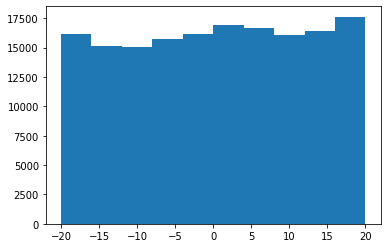

In [5]:
plt.hist(df_1.drop(columns=['fitness']).values.flatten())

(array([ 57.,  53.,  59.,  55.,  54., 101.,  25.,  19.,  33.,  58.]),
 array([-0.58963966, -0.52068882, -0.45173798, -0.38278714, -0.31383629,
        -0.24488545, -0.17593461, -0.10698377, -0.03803293,  0.03091792,
         0.09986876]),
 <BarContainer object of 10 artists>)

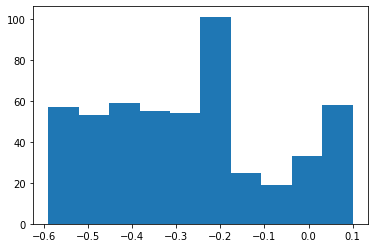

In [6]:
plt.hist(df_1['fitness'].values.flatten())

In [49]:
test = [200,102.85,103.4,104.2,101.69,107.23,106.87,105.42,106.77,106.91,103.08,103.36,103.22,106.52,103.51,106.68,104.87,107.42,103.54]

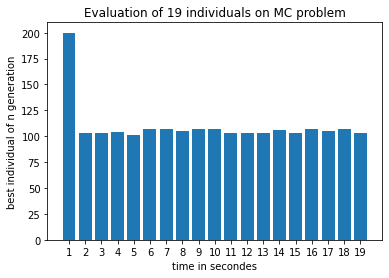

In [65]:
plt.bar(np.arange(1,len(test)+1,step=1),test)
plt.xticks(np.arange(1,len(test)+1,step=1))
plt.xlabel("time in secondes")
plt.ylabel("best individual of n generation")
plt.title("Evaluation of 19 individuals on MC problem")
# plt.savefig('eval_19_indiv.pdf')
plt.show()


In [30]:
df_06 = pd.read_csv('/home/wasab/L2L_LO/SG_data_06.csv')

In [20]:
df_06.describe()

,fitness,amp,phase
count,11553.000000,11553.000000,11553.000000
mean,-0.153225,0.870362,0.691183
std,0.608309,0.376172,0.490847
min,-3.486636,-0.265756,-0.513765
25%,-0.470494,0.595759,0.295605
50%,-0.029517,0.904668,0.694109
75%,0.321612,1.179185,1.023597
max,0.599730,1.845121,2.107378


In [21]:
df_06

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
...,...,...,...
11548,0.533837,1.163603,0.845801
11549,0.582630,1.185718,0.861585
11550,0.568132,1.229921,0.857287
11551,0.584905,1.178545,0.837478


In [22]:
11553/512

22.564453125

In [3]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [11]:
pd.read_csv('/home/wasab/L2L_LO/data_category.csv').describe()

,fitness,amp,phase
count,16814.000000,16814.000000,16814.000000
mean,0.135571,1.275393,0.450018
std,0.663177,0.150698,0.454787
min,-3.486636,1.153980,-0.547263
25%,-0.255163,1.158244,0.030712
50%,0.294779,1.214405,0.289834
75%,0.679001,1.284777,0.905127
max,0.899941,1.856725,0.953965


In [9]:
df_all[df_all['fitness'] < 0.9]

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
...,...,...,...
25991,0.873272,1.126349,0.829085
25992,0.878788,1.137883,0.840283
25993,0.892531,1.177042,0.853180
25994,0.893838,1.140899,0.868023


In [10]:
16814/512


32.83984375

In [5]:
a = 0.51443
b = 0.51233
c = 0.412

abs(a-b)

0.002100000000000102

In [4]:
abs(a-c)

0.10043000000000007

In [7]:
0.001 <= 0.01

True

In [8]:
0.9/2

0.45

In [9]:
0.0001 <= 0.01

True

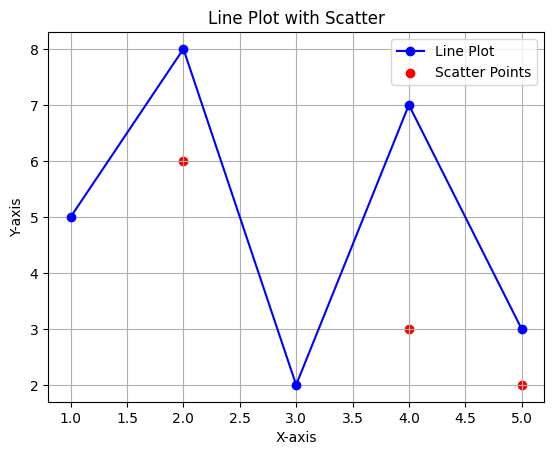

In [2]:

# Sample data for the line plot
x_line = [1, 2, 3, 4, 5]
y_line = [5, 8, 2, 7, 3]

# Sample data for the scatter plot
x_scatter = [2, 4, 5]
y_scatter = [6, 3, 2]

# Creating the line plot
plt.plot(x_line, y_line, marker='o', linestyle='-', color='b', label='Line Plot')

# Adding scatter points
plt.scatter(x_scatter, y_scatter, color='r', label='Scatter Points')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Scatter')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
x = [15,20,30,40,60]
y = [2,4]

x[]

TypeError: slice indices must be integers or None or have an __index__ method

In [13]:
y+1

TypeError: can only concatenate list (not "int") to list

In [48]:
random = np.random.RandomState(34)
range_ = 100
am = [random.uniform(1,6) for i in range(range_)]
ph = [random.uniform(-1,4) for i in range(range_)]

In [49]:
np.mean(am)

3.554147121989605

In [50]:
np.mean(ph)

1.3048075466201163

In [51]:
(-2+6)/2

2.0

In [ ]:
amp = [1,3]
phase = [-1,1]

amp = [-5,2]
phase = [-3,1]

In [52]:
a = [[1,2,3],[4,5,6],[7,8,9]]

np.mean([i[0] for i in a])

4.0

In [112]:
targets = ['amp', 'phase']
def min_distance_old(row, ref_array):
    current_individuals = np.array([row[i] for i in targets])
    distances = np.array([np.linalg.norm(current_individuals - y) for y in ref_array])

    # print(distances)
    
    # x_percent = round(len(ref_array)*percent / 100) if round(len(ref_array)*percent / 100) > 1 else 10
    x_percent = 2
    ind = distances.argsort()[:x_percent]

    targets_list = [np.mean([a[i] for a in ref_array[ind]]) for i in range(len(targets))]
    return targets_list

def min_distance_new(row, ref_array):
    current_individuals = np.array([row[i] for i in targets])
    distances = np.linalg.norm(ref_array - current_individuals, axis=1)
    
    percent = 1
    x_percent = round(len(ref_array)*percent / 100) if round(len(ref_array)*percent / 100) > 1 else 10
    x_percent = 2
    
    ind = np.argpartition(distances, x_percent)[:x_percent]
    # ind = np.argsort(distances)[:x_percent]

    targets_list = [np.mean(ref_array[ind][:, i]) for i in range(len(targets))]

    return targets_list

In [113]:
df_test = df_all.head(10)
df_test_1 = df_all.head(10)
df_test_2 = df_all.head(10)
ref = np.array([[0.9, 0.5],[0.8,0.4],[0.93,0.48],[0.91,0.5],[0.92,0.48],[0.95,0.43]])

In [114]:
df_test_1[['amp','phase']] = df_test_1.apply(
    lambda row: min_distance_old(row=row, ref_array=ref), axis=1,
    result_type='expand')

df_test_1

/tmp/ipykernel_7993/1996587308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1[['amp','phase']] = df_test_1.apply(


,fitness,amp,phase
0,0.582789,0.940,0.455
1,0.547949,0.925,0.480
2,0.547136,0.925,0.480
3,0.546787,0.925,0.480
4,0.538417,0.925,0.480
5,0.536505,0.925,0.480
6,0.534308,0.925,0.480
7,0.530608,0.925,0.480
8,0.530140,0.925,0.480
9,0.510519,0.905,0.500


In [115]:
df_test_2[['amp','phase']] = df_test_2.apply(
    lambda row: min_distance_new(row=row, ref_array=ref), axis=1,
    result_type='expand')

df_test_2

/tmp/ipykernel_7993/2318134576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_2[['amp','phase']] = df_test_2.apply(


,fitness,amp,phase
0,0.582789,0.940,0.455
1,0.547949,0.925,0.480
2,0.547136,0.925,0.480
3,0.546787,0.925,0.480
4,0.538417,0.925,0.480
5,0.536505,0.925,0.480
6,0.534308,0.925,0.480
7,0.530608,0.925,0.480
8,0.530140,0.925,0.480
9,0.510519,0.905,0.500


In [116]:
df_test

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
5,0.536505,0.897178,0.452097
6,0.534308,0.922584,0.478259
7,0.530608,0.949696,0.504173
8,0.530140,0.921374,0.483138
9,0.510519,0.912729,0.503341


In [106]:
df_test_1 == df_test_2

,fitness,amp,phase
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,True,False,False


In [119]:
a = [[1,4],[5,6],[11,22]]
np.mean(a, axis=0)

array([ 5.66666667, 10.66666667])

In [120]:
df_test

,fitness,amp,phase
0,0.582789,0.966591,0.445336
1,0.547949,0.946321,0.478335
2,0.547136,0.925544,0.462337
3,0.546787,0.948388,0.481534
4,0.538417,0.928945,0.477718
5,0.536505,0.897178,0.452097
6,0.534308,0.922584,0.478259
7,0.530608,0.949696,0.504173
8,0.530140,0.921374,0.483138
9,0.510519,0.912729,0.503341


In [155]:
me = df_test[['amp','phase']][df_test['fitness'] > 0.54].to_numpy()
np.mean(me, axis=0)

array([0.94671122, 0.46688548])

In [136]:
current = np.mean(ref, axis=0)

In [138]:
centroids_list = [np.mean(ref, axis=0)]

In [142]:
adjust = np.mean(centroids_list, axis=0) - centroids_list

In [143]:
adjust

array([[0., 0.]])

In [146]:
test = []
test.append([1,2])
test.append(np.array([3,4]))

In [147]:
test

[[1, 2], array([3, 4])]

In [148]:
np.mean(test, axis=0)

array([2., 3.])

In [160]:
di = {11:[1,2,3], 22:[4,5,6]}
ou = pd.DataFrame(di).T
ou

,0,1,2
11,1,2,3
22,4,5,6


In [164]:
ou.loc[22].values

array([4, 5, 6])

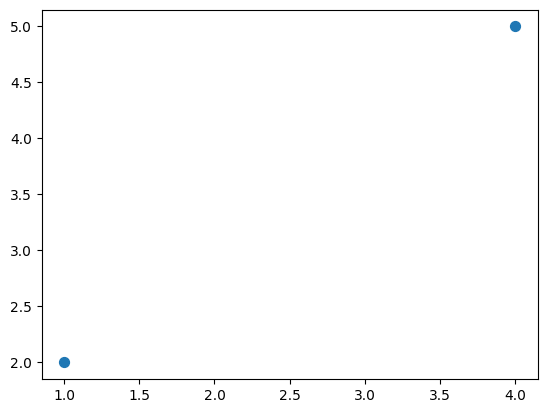

In [168]:
plt.scatter(ou[0],ou[1], s=50)

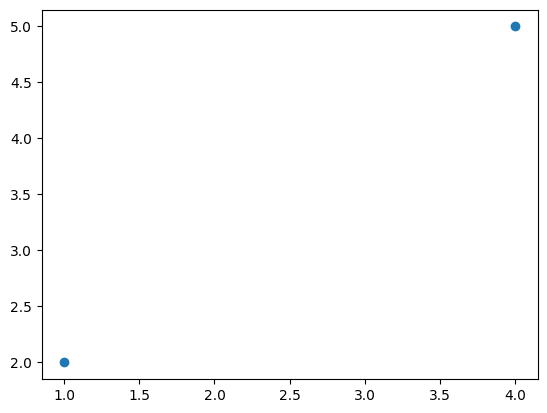

In [169]:
plt.scatter(ou[0],ou[1])

NameError: name 'rcParams' is not defined